In [2]:
import pandas as pd

dataframe = pd.read_csv(
    "sentences.csv.zip",
    index_col=False,
    compression="zip",
)

dataframe.shape

(2264, 2)

In [8]:
#Exploracion

dataframe.head()

# Sentimientos (clases)
print(dataframe.target.value_counts())
print()
# Ejemplos de frases positivas
for i in range(5):
    print(dataframe[dataframe.target == "positive"]["phrase"].iloc[i])

print()
# Ejemplos de frases negativas
for i in range(5):
    print(dataframe[dataframe.target == "negative"]["phrase"].iloc[i])

print()
# Ejemplos de frases neutras
for i in range(5):
    print(dataframe[dataframe.target == "neutral"]["phrase"].iloc[i])


target
neutral     1391
positive     570
negative     303
Name: count, dtype: int64

For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m 
In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn 
Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales 
Operating profit totalled EUR 21.1 mn , up from EUR 18.6 mn in 2007 , representing 9.7 % of net sales 
Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn 

Jan. 6 -- Ford is struggling in the face of slowing truck and SUV sales and a surfeit of up-to-date , gotta-have cars 
Pharmaceuticals group Orion Corp reported a fall in its third-quarter earnings that were 

In [10]:
# Particionamiento de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataframe.phrase,
    dataframe.target,
    test_size=0.3,
    shuffle=False,
)

# Preprocesamiento de texto
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    lowercase=True,
    analyzer="word",
    token_pattern=r"\b[a-zA-Z]\w+\b",
    stop_words="english",
    max_df=0.99,
    min_df=2,
    binary=True,
)
vectorizer.fit(X_train)

CountVectorizer(binary=True, max_df=0.99, min_df=2, stop_words='english',
                token_pattern='\\b[a-zA-Z]\\w+\\b')

In [11]:
# Columnas de la matriz documento-termino
vectorizer.get_feature_names_out()

array(['ab', 'able', 'abp', ..., 'years', 'yesterday', 'yit'],
      dtype=object)

In [12]:
# Especificación del model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf


# Entrenamiento del modelo
X_train_vectorized = vectorizer.transform(X_train)

clf.fit(
    X_train_vectorized,
    y_train,
)


# Evaluación de la precisión del modelo
from sklearn.metrics import accuracy_score


# Muestra de entrenamiento
accuracy_score(
    y_true=y_train,
    y_pred=clf.predict(X_train_vectorized),
)



# Muestra de prueba
X_test_vectorized = vectorizer.transform(X_test)
predictions = clf.predict(X_test_vectorized)

accuracy_score(
    y_true=y_test,
    y_pred=predictions,
)


0.5323529411764706

Confusion matrix:
[[  2  78 189]
 [  0 344  39]
 [  0  12  16]]


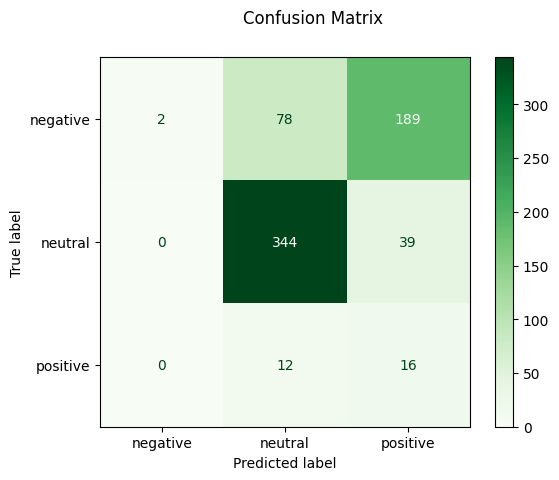

In [13]:
# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")


In [14]:
# Almacenamiento del modelo

import pickle

with open("clf.pickle", "wb") as file:
    pickle.dump(clf, file)

with open("vectorizer.pickle", "wb") as file:
    pickle.dump(vectorizer, file)

In [15]:
#Uso del modelo

with open("clf.pickle", "rb") as file:
    new_clf = pickle.load(file)

with open("vectorizer.pickle", "rb") as file:
    new_vectorizer = pickle.load(file)

accuracy_score(
    y_true=dataframe.target,
    y_pred=new_clf.predict(new_vectorizer.transform(dataframe.phrase)),
)


0.8542402826855123